# Rao-Blackwellization
Rao-Blackwellization is a statistical method for constructing a better estimator, in the term of its mean square error, by transforming a crude estimator. The transformed estimator is often called a Rao-Blackwellized estimator; its mean square error is always smaller than or equal to that of the crude estimator, which is guaranteed by the Rao-Blackwell Theorem (https://en.wikipedia.org/wiki/Rao–Blackwell_theorem)

In this example, Rao-Blackwellization is applied for both point estimation and density estimation. In both cases, the Rao-Blackwellized estimator is much better than the crude estimator used for constructing the Rao-Blackwellized estimator.

## 1. Point Estimator
Random variable $T$ has a standard Student's t-distribution with degree of freedom of $\nu\ $ ($\mathcal{T}(\nu)$) and it has probability density function:
$$p(t\ |\ \nu)=\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\pi\nu}\ \Gamma(\frac{\nu}{2})} (1+\frac{t^2}{\nu})^{-\frac{\nu+1}{2}}, t \in (-\infty,\infty).$$
The transformation $X = \mu + \sigma T$ generates a new random variable $X$,which has non-standard Student's t-distribution ($\mathcal{T}(\nu,\mu,\sigma^2)$) with density function:
$$p(x\ |\ \nu,\mu,\sigma^2)=\frac{\Gamma(\frac{\nu+1}{2})}{\sigma\sqrt{\pi\nu}\ \Gamma(\frac{\nu}{2})} (1+\frac{1}{\nu}(\frac{x-\mu}{\sigma})^2)^{-\frac{\nu+1}{2}}, x \in (-\infty,\infty),$$
where $\mu$ is the location parameter and $\sigma$ is the scale parameter.

Using Dickey's decomposition, we can simulate the non-standard Student's t-distribution as a gamma mixture of normal distribution:
$$X\ |\ y \sim \mathcal{N}(\mu, \sigma^2y) \text{ and } Y^{-1}\sim \Gamma(\frac{\nu}{2},\frac{2}{\nu}) \Rightarrow X \sim \mathcal{T}(\nu,\mu,\sigma^2) $$

In this example, we are interested in estimating the expected value of $h(x)=\exp(-x^2)$ for $X \sim \mathcal{T}(\nu,\mu,\sigma^2)$ using samples $\{(y_i,x_i),i=1,2,...n\}$ generated from the distribution. We would compare two different estimators: naive estimator and Rao-Blacwellized estimator based on the naive estimator.

1. **Naive Estimator**
$$\hat{h}=\frac{1}{n}\sum_{i=1}^{n}{\exp(-x_i^2)}$$

2. **Rao-Blackwellized Estimator**
$$\hat{h}^* =\frac{1}{n}\sum_{i=1}^{n}{\mathop{\mathbb{E}}[\exp(-X^2)\ |\ y_i]} 
= \frac{1}{n}\sum_{i=1}^{n}{\frac{1}{\sqrt{2\sigma^2y_i+1}}}$$
$$\hat{h}^* =\frac{1}{n}\sum_{i=1}^{n}{\mathbb{E}[\exp(-X^2)\ |\ y_i]} 
= \frac{1}{n}\sum_{i=1}^{n}{\frac{1}{\sqrt{2\sigma^2y_i+1}}}$$

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

In [49]:
## parameters for the non-standard Student's t-distribution
nu = 4.6
mu = 0.0
sigma = 1.0
## the true value of the expectation of exp(-x^2) calculated 
## using numerical integration
trueValue = 0.537332 

In [50]:
## repeat the estimations of exp(-x^2) to get the variance 
## of the estimation
R = 50 # num of repeats
naive = []
RaoBlackwellization = []
native = []
r = 1
while r <= 50:
    ## simulate (X,Y) from the joint distribution
    N = 500
    data = []
    for i in range(N):
        y = 1/np.random.gamma(nu/2.0, 2.0/nu)
        x = np.random.normal(mu, np.sqrt(sigma**2*y))
        data.append((x,y))

    ## naive estimate exp(-x^2)
    naiveEstimate = []
    naiveCumsum = 0.0
    for i in range(N):
        naiveCumsum += np.exp(-data[i][0]**2)
        naiveEstimate.append(naiveCumsum / float(i+1))
    naive.append(naiveEstimate);

    ## Rao-Blackwellization estimation
    RaoBlackwellizedEstimate = []
    RaoBlackwellizedCumsum = 0.0
    for i in range(N):
        RaoBlackwellizedCumsum += 1.0/np.sqrt(2.0 * data[i][1] + 1)
        RaoBlackwellizedEstimate.append(
            RaoBlackwellizedCumsum/float(i+1))
    RaoBlackwellization.append(RaoBlackwellizedEstimate)
    r+=1

    ## simulate X from the native T distribution
    nativeX = stats.t.rvs(nu, loc = mu, scale = sigma, size = N)
    nativeEstimate = []
    nativeCumsum = 0
    for i in range(N):
        nativeCumsum += np.exp(-nativeX[i]**2)
        nativeEstimate.append(nativeCumsum / float(i+1))
    native.append(nativeEstimate);

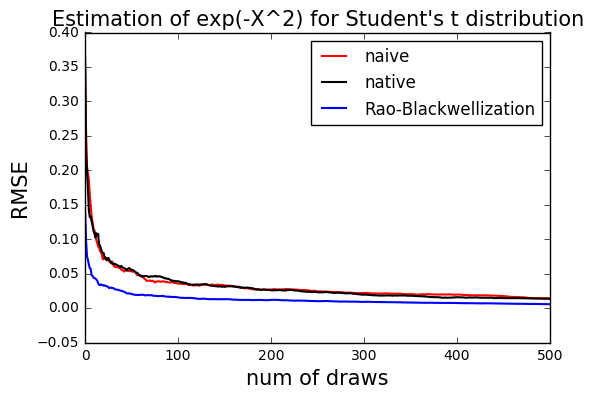

In [51]:
## plot the results
naive = np.array(naive)
naiveMean = naive.mean(0)
naiveStd = np.sqrt(((naive - trueValue)**2).mean(0))

RaoBlackwellization = np.array(RaoBlackwellization)
RaoBlackwellizationMean = RaoBlackwellization.mean(0)
RaoBlackwellizationStd = 
  np.sqrt(((RaoBlackwellization - trueValue)**2).mean(0))

native = np.array(native)
nativeMean = native.mean(0)
nativeStd = np.sqrt(((native - trueValue)**2).mean(0))

plt.plot(naiveStd, label = "naive", color = "red", linewidth = 1.5)
plt.plot(nativeStd, label = "native", color = "black", linewidth = 1.5)
plt.plot(RaoBlackwellizationStd, label = "Rao-Blackwellization", 
         color = "blue", linewidth = 1.5)
plt.ylim(-0.05)
plt.legend()
plt.title("Estimation of exp(-X^2) for Student's t distribution",
          fontsize = 15)
plt.xlabel("num of draws", fontsize = 15)
plt.ylabel("RMSE",fontsize = 15)

(0.3, 0.7)

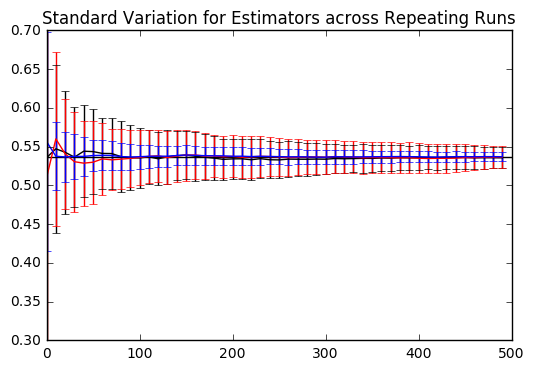

In [52]:
## standard variation 
plt.errorbar(range(500)[::10],nativeMean[::10], 
             yerr = nativeStd[::10], color = "black")
plt.errorbar(range(500)[::10],naiveMean[::10], 
             yerr = naiveStd[::10], color = "red")
plt.errorbar(range(500)[::10],RaoBlackwellizationMean[::10], 
             yerr = RaoBlackwellizationStd[::10], color = "blue")
plt.hlines(y=trueValue,xmin = 0,xmax = 500)
plt.title("Standard Variation for Estimators across Repeating Runs")
plt.ylim((0.3,0.7))

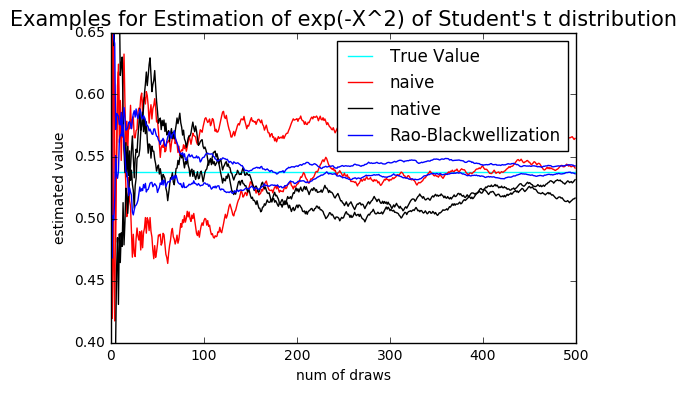

In [53]:
## plot some sample estimations
plt.clf()
plt.plot([trueValue for i in range(N)], 
         label = "True Value", color = "cyan")
plt.plot(naive[0,:], label = "naive", color = "red")
plt.plot(naive[10,:], color = "red")
plt.plot(native[0,:], label = "native", color = "black")
plt.plot(native[10,:], color = "black")
plt.plot(RaoBlackwellization[0,:], 
         label = "Rao-Blackwellization", color = "blue")
plt.plot(RaoBlackwellization[10,:], color = "blue")
plt.ylim((0.40, 0.65))
plt.legend()
plt.title("Examples for Estimation of exp(-X^2) of \
          Student's t distribution",
          fontsize = 15)
plt.xlabel("num of draws")
plt.ylabel("estimated value")

## 2.**Density Estimation**
In this example, we still work with the non-standard Student's t-distribution: $\mathcal{T}(\nu,\mu,\sigma^2)$. The difference is that here we are now interested in estimating the density function using samples $\{(y_i,x_i),i=1,2,...n\}$ generated from the distribution. Again we would compare two different estimators: naive estimator and Rao-Blacwellized estimator based on the naive estimator.

1.**Naive Estimator**

Kernel based density estimation with Gaussian Kernel is used.
$$\hat{p}(x)= \frac{1}{n}\sum_{i=1}^{n}{f(x\ |\ x_i,w)},$$
where $f(x\ |\ x_i,w) = \frac{1}{\sqrt{2\pi}w}\exp(-\frac{1}{2}(\frac{x-x_i}{w})^2)$, and $w$ is the kernel width.

2.**Rao-Blackwellized Estimator**
$$\hat{p}^*(x)=\frac{1}{n}\sum_{i=1}^{n}{p(x\ |\ y_i)}=\frac{1}{\sqrt{2\pi\sigma^2y}}\exp(-\frac{1}{2}(\frac{x-\mu}{\sigma\sqrt{y}})^2)$$


In [64]:
## true underlying density                                                                                                                                                                   
X = np.linspace(-10,10,200)
original_den = stats.t.pdf(X, nu, loc = mu, scale = sigma)

#### calcuate absolute error (AE) for naive method and 
#### Rao-Blackwellization method                                                                                                           
## simulate (X,Y) from the joint distribution                                                                                                                                                
N = 1000
data = []
X_sample = []
Y_sample = []
for i in range(N):
    y = 1.0/np.random.gamma(nu/2.0, 2.0/nu)
    x = np.random.normal(mu, np.sqrt(sigma**2*y))
    X_sample.append(x)
    Y_sample.append(y)
    data.append((x,y))
X_sample = np.reshape(X_sample, (-1,1))

naive_AE = []
RaoBlackwellized_AE = []
for k in range(50,N+1,50):
    ## print(k)
    ## density estimation using kernel method                                                                                                                                                
    kde = KernelDensity(kernel = "gaussian", 
                        bandwidth = 0.5).fit(X_sample[0:k])
    log_den = kde.score_samples(np.reshape(X, (-1,1)))
    naive_den = np.exp(log_den)
    naive_AE.append(np.sum(np.abs(naive_den - original_den)))

    ## density estimation using Rao-Blackwellization                                                                                                                                         
    RaoBlackwellized_den = []
    for x in X:
        cumsum = 0.0
        for y in Y_sample[0:k]:
            cumsum += stats.norm.pdf(x, loc = mu, 
                                     scale = np.sqrt(sigma**2*y))
        RaoBlackwellized_den.append(cumsum / k)
    RaoBlackwellized_den = np.array(RaoBlackwellized_den)
    RaoBlackwellized_AE.append(np.sum(np.abs(RaoBlackwellized_den 
                                             - original_den)))

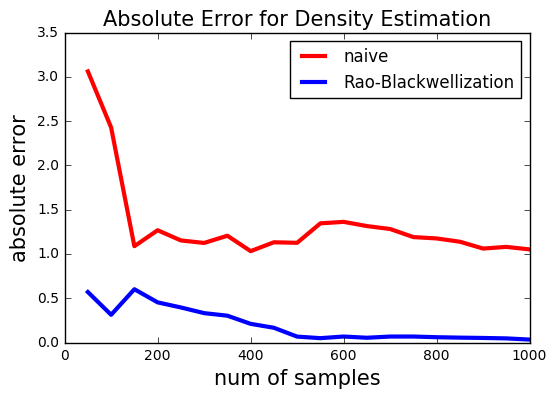

In [65]:
plt.plot(range(50,N+1,50), naive_AE, label = "naive", 
         color = "red", linewidth = 3)
plt.plot(range(50,N+1,50), RaoBlackwellized_AE, 
         label = "Rao-Blackwellization", 
         color = "blue", linewidth = 3)
plt.xlabel("num of samples", fontsize = 15)
plt.ylabel("absolute error", fontsize = 15)
plt.title("Absolute Error for Density Estimation", 
          fontsize = 15)
plt.legend()

In [74]:
## density estimation using Rao-Blackwellization
RaoBlackwellized_den = []
for x in X:              
    cumsum = 0.0         
    for y in Y_sample:   
        cumsum += stats.norm.pdf(x, loc = mu, 
                                 scale = np.sqrt(sigma**2*y))
    RaoBlackwellized_den.append(cumsum / N)                                                                                                                                        

naive: 1.0511, Rao-Blackwellization: 0.0329


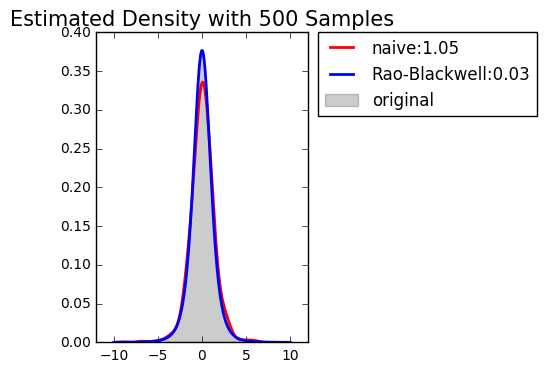

In [83]:
## plot
naive_AE = np.sum(np.abs(naive_den - original_den)) 
RaoBlackwellized_AE = np.sum(np.abs(RaoBlackwellized_den - original_den))  
print("naive: {0:.4f}, Rao-Blackwellization: {1:.4f}".format(
        naive_AE, RaoBlackwellized_AE))
plt.subplot(121)                                                                            
plt.fill(X, original_den, label = "original", fc='black', 
         alpha=0.2)                        
plt.plot(X, naive_den, label = "naive:{0:.2f}".format(naive_AE), 
         color = "red", linewidth = 2)
plt.plot(X, RaoBlackwellized_den, 
         label = "Rao-Blackwell:{0:.2f}".format(RaoBlackwellized_AE),
         color = "blue", linewidth = 2)
plt.title("Estimated Density with 500 Samples", fontsize = 15)
plt.xlim((-12,12))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Summary
As shown in both point estimation and density estimation examples, the Rao-Blackwellized estimators are better than the original estimator used for constructing the Rao-Blackwellized estimators.